<a href="https://colab.research.google.com/github/lasyareddy360/Flat-Price-Estimation-for-UrbanNest-Realtors/blob/main/360.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1. Upload CSV manually
from google.colab import files
uploaded = files.upload()


Saving Flat Price Estimation for UrbanNest Realtors.csv to Flat Price Estimation for UrbanNest Realtors.csv


In [ ]:
# 2. Install necessary libraries
!pip install pandas numpy matplotlib seaborn scikit-learn


In [ ]:
# 3. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

sns.set(style="whitegrid")


In [ ]:
# 4. Load uploaded CSV file
import io
filename = next(iter(uploaded))
df = pd.read_csv(io.BytesIO(uploaded[filename]))

# Show column names
print("Columns in dataset:\n", df.columns)
df.head()


Columns in dataset:
 Index(['area_sqft', 'bedrooms', 'distance_to_metro_km', 'age_of_flat_years',
       'amenities_score', 'flat_price'],
      dtype='object')


,area_sqft,bedrooms,distance_to_metro_km,age_of_flat_years,amenities_score,flat_price
0,693.0,4,2.49,17,7.0,2077761.0
1,755.0,3,2.04,11,1.3,2185745.0
2,1646.0,4,1.46,22,1.0,4343281.0
3,1036.0,4,0.10,6,7.7,3037490.0
4,1064.0,2,1.50,24,6.3,3019102.0


In [ ]:
# 5. Try to find the target column automatically
# Look for something like 'price' (case-insensitive)
target_col = None
for col in df.columns:
    if 'price' in col.lower():
        target_col = col
        break

if not target_col:
    raise ValueError("❌ No column found related to 'price'. Please check your CSV.")

print(f"✅ Target column detected: {target_col}")


✅ Target column detected: flat_price


In [ ]:
# 6. Data Overview
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   area_sqft             1000 non-null   float64
 1   bedrooms              1000 non-null   int64  
 2   distance_to_metro_km  1000 non-null   float64
 3   age_of_flat_years     1000 non-null   int64  
 4   amenities_score       1000 non-null   float64
 5   flat_price            1000 non-null   float64
dtypes: float64(4), int64(2)
memory usage: 47.0 KB


,0
area_sqft,0
bedrooms,0
distance_to_metro_km,0
age_of_flat_years,0
amenities_score,0
flat_price,0


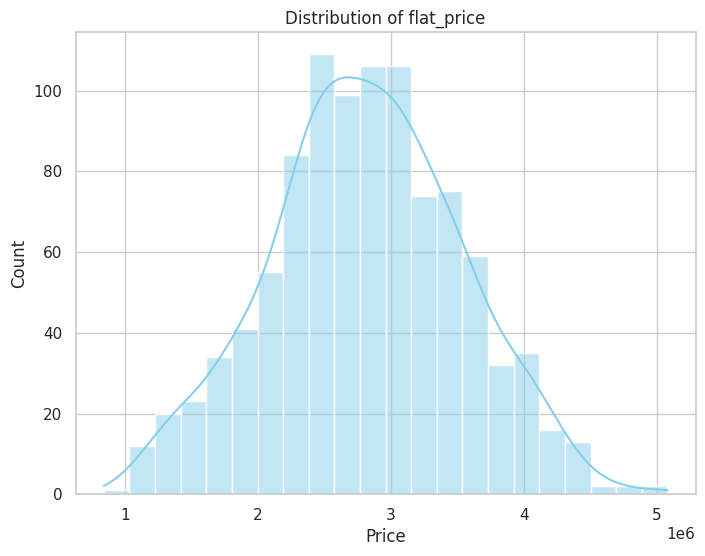

In [ ]:
# 7. Plot price distribution
plt.figure(figsize=(8,6))
sns.histplot(df[target_col], kde=True, color='skyblue')
plt.title(f"Distribution of {target_col}")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()


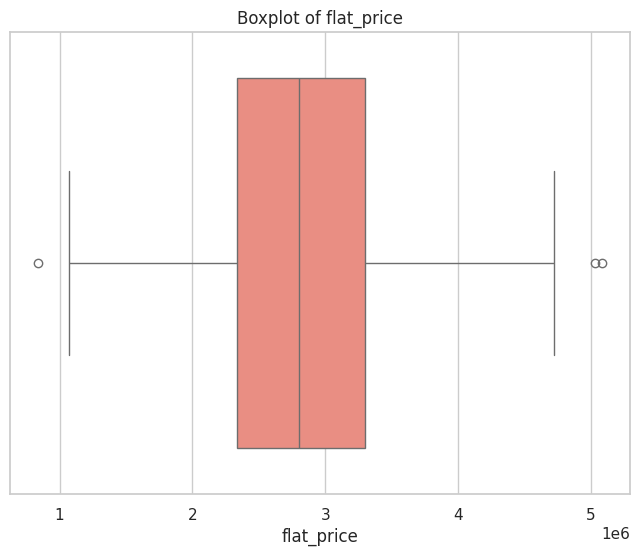

In [ ]:
# 8. Boxplot for price outliers
plt.figure(figsize=(8,6))
sns.boxplot(x=df[target_col], color='salmon')
plt.title(f"Boxplot of {target_col}")
plt.show()


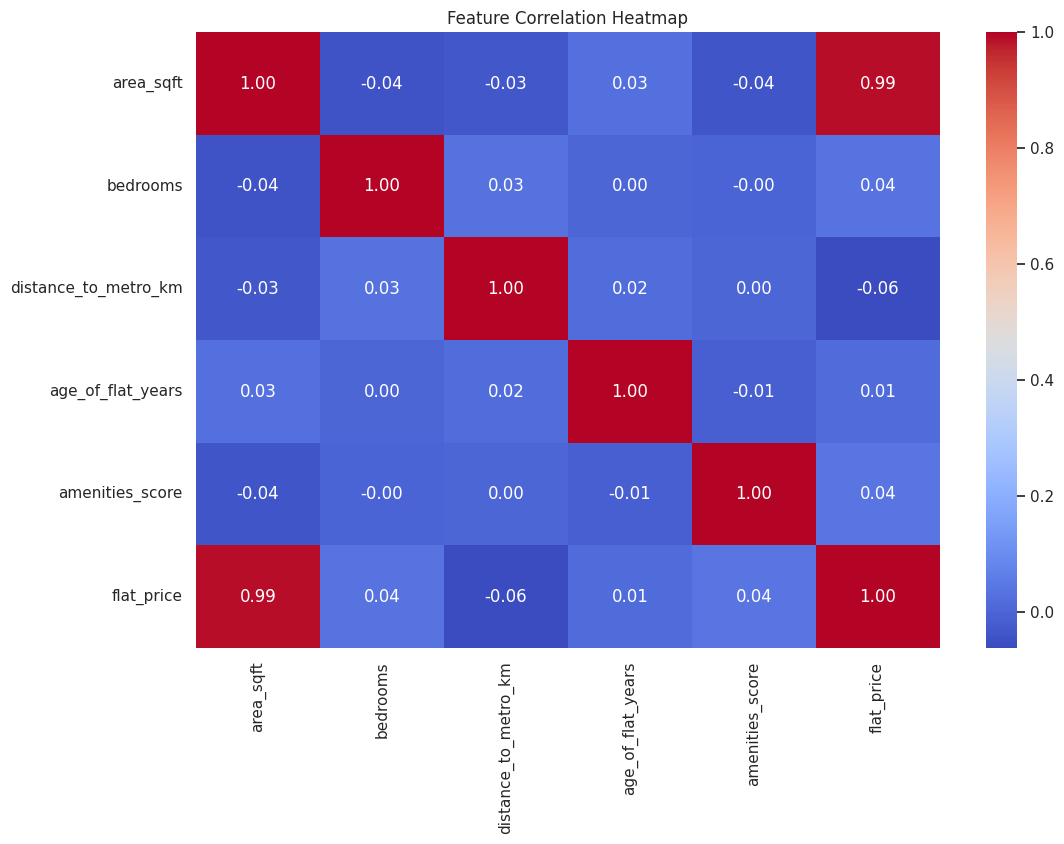

In [ ]:
# 9. Correlation heatmap (only for numeric)
plt.figure(figsize=(12,8))
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()


In [ ]:
# 10. Drop rows with missing values
df = df.dropna()


In [ ]:
# 11. Feature and target split
X = df.drop(target_col, axis=1)
y = df[target_col]

# Encode categoricals
X = pd.get_dummies(X, drop_first=True)


In [ ]:
# 12. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# 13. Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [ ]:
# 14. Model evaluation (values converted to ₹ from lakhs)
conversion_factor = 1_00_000  # 1 lakh = 100,000 rupees

y_pred_rupees = y_pred * conversion_factor
y_test_rupees = y_test * conversion_factor

print("✅ Model Evaluation Metrics (in ₹):")
print("Mean Absolute Error (MAE): ₹{:,.2f}".format(mean_absolute_error(y_test_rupees, y_pred_rupees)))
print("Mean Squared Error (MSE): ₹{:,.2f}".format(mean_squared_error(y_test_rupees, y_pred_rupees)))
print("Root Mean Squared Error (RMSE): ₹{:,.2f}".format(np.sqrt(mean_squared_error(y_test_rupees, y_pred_rupees))))
print("R-squared (R2):", r2_score(y_test, y_pred))  # R2 is unitless



✅ Model Evaluation Metrics (in ₹):
Mean Absolute Error (MAE): ₹5,324,340,540.00
Mean Squared Error (MSE): ₹42,663,159,753,232,211,968.00
Root Mean Squared Error (RMSE): ₹6,531,704,199.77
R-squared (R2): 0.9913898110337281


/tmp/ipython-input-16-4238483384.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


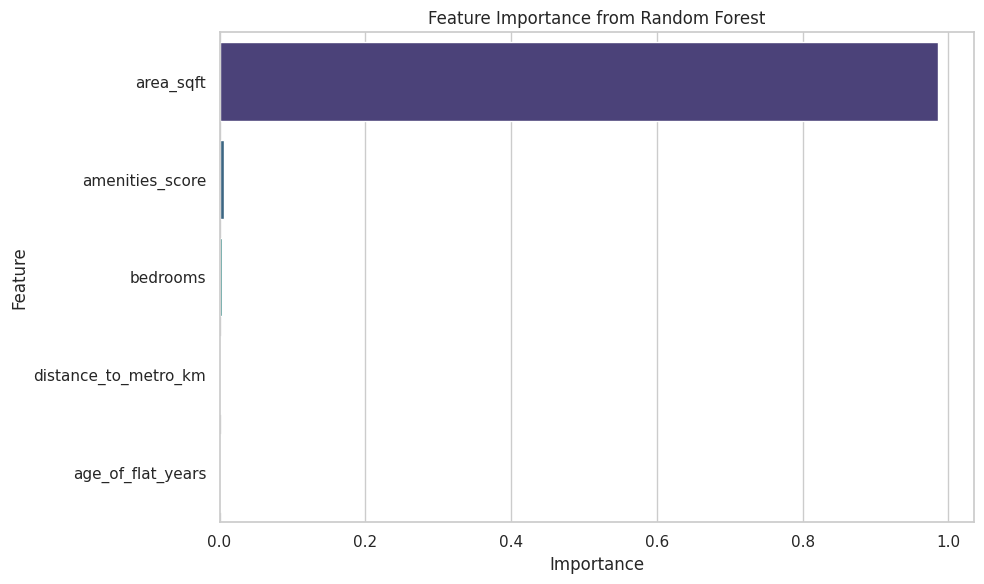

In [ ]:
# 15. Feature importance
importances = model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title("Feature Importance from Random Forest")
plt.tight_layout()
plt.show()
